In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "/Users/rohan/Documents/Homework/APIhw/python-api-challenge/output_data/02-Homework_06-Python-APIs_Instructions_output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

603
603


In [5]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

city = cities[6]
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 20.04, 'lat': -34.53},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 54.43,
  'feels_like': 51.1,
  'temp_min': 53.01,
  'temp_max': 55.4,
  'pressure': 1024,
  'humidity': 76},
 'wind': {'speed': 4.7, 'deg': 310},
 'clouds': {'all': 37},
 'dt': 1580085687,
 'sys': {'type': 1,
  'id': 1966,
  'country': 'ZA',
  'sunrise': 1580097262,
  'sunset': 1580147417},
 'timezone': 7200,
 'id': 1015776,
 'name': 'Bredasdorp',
 'cod': 200}

In [6]:
# Get weather data
print("Beginning Data Retrival")
print("------------------------------")
set_count = 1
record_count = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | port hardy
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | strezhevoy
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | hilo
City not found. Skipping...
Processing Record 21 of Set 1 | tasiilaq
Processing

Processing Record 29 of Set 4 | keetmanshoop
Processing Record 30 of Set 4 | college
Processing Record 31 of Set 4 | acapulco
Processing Record 32 of Set 4 | mangrol
Processing Record 33 of Set 4 | yatou
Processing Record 34 of Set 4 | itarema
City not found. Skipping...
Processing Record 35 of Set 4 | puerto el triunfo
Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | gorontalo
Processing Record 38 of Set 4 | encruzilhada
Processing Record 39 of Set 4 | shiyan
Processing Record 40 of Set 4 | constitucion
Processing Record 41 of Set 4 | nishihara
Processing Record 42 of Set 4 | lakatoro
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | novovasylivka
Processing Record 46 of Set 4 | ugoofaaru
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | jutai
Processing Record 50 of Set 4 | russell
Processing Record 0 of Set 5 | saskylakh
Processing Reco

Processing Record 19 of Set 8 | adolfo lopez mateos
Processing Record 20 of Set 8 | cidreira
Processing Record 21 of Set 8 | scarborough
Processing Record 22 of Set 8 | bulaevo
Processing Record 23 of Set 8 | khaga
Processing Record 24 of Set 8 | flin flon
Processing Record 25 of Set 8 | quang ngai
Processing Record 26 of Set 8 | burns lake
Processing Record 27 of Set 8 | marawi
City not found. Skipping...
Processing Record 28 of Set 8 | panchgani
Processing Record 29 of Set 8 | vestmannaeyjar
Processing Record 30 of Set 8 | novobohdanivka
Processing Record 31 of Set 8 | san borja
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | yangambi
Processing Record 34 of Set 8 | paidha
Processing Record 35 of Set 8 | mahanoro
Processing Record 36 of Set 8 | aviles
City not found. Skipping...
Processing Record 37 of Set 8 | maldonado
Processing Record 38 of Set 8 | popondetta
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | brae
Processing Rec

In [9]:
#Display the DataFrame
weather_df = pd.DataFrame(weather_data)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port hardy,90,CA,1580085688,93,50.70,-127.42,44.60,6.93
1,tiksi,0,RU,1580085688,69,71.69,128.87,-32.44,2.77
2,kaitangata,92,NZ,1580085688,67,-46.28,169.85,68.00,8.77
3,punta arenas,90,CL,1580085688,58,-53.15,-70.92,53.60,11.41
4,strezhevoy,90,RU,1580085401,84,60.73,77.59,6.80,13.42


In [10]:
weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [11]:
#Export the city data into a .csv.
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

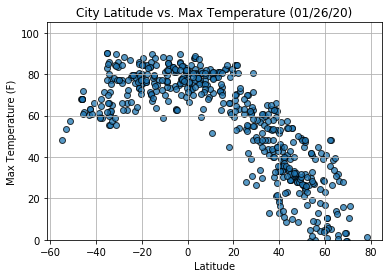

In [16]:
#Latitude vs. Temperature Plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (01/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()

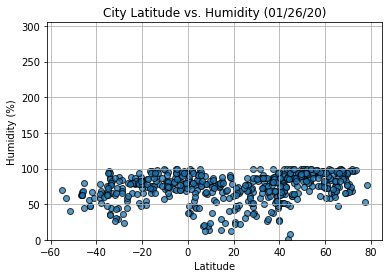

In [21]:
#Latitude vs. Humidity Plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (01/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,305)
plt.grid(True)

plt.savefig("LatVsHumidity.png")
plt.show()

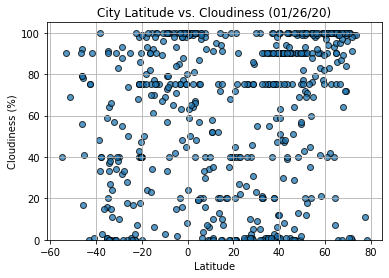

In [22]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (01/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("LatVsCloudiness.png")
plt.show()

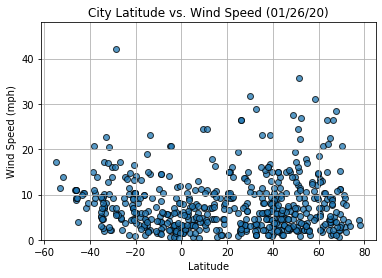

In [24]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (01/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,48)
plt.grid(True)

plt.savefig("LatVsWindSpeed.png")
plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df["Lat"] >= 0.0, :]
northern.reset_index(inplace=True)
northern.head(10)

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,port hardy,90,CA,1580085688,93,50.70,-127.42,44.60,6.93
1,1,tiksi,0,RU,1580085688,69,71.69,128.87,-32.44,2.77
2,4,strezhevoy,90,RU,1580085401,84,60.73,77.59,6.80,13.42
3,8,cherskiy,100,RU,1580085689,87,68.75,161.30,-22.50,0.63
4,10,ribeira grande,94,PT,1580085689,89,38.52,-28.70,59.20,16.71
5,13,qaanaaq,11,GL,1580085689,53,77.48,-69.36,-10.34,4.43
6,15,los llanos de aridane,75,ES,1580085422,67,28.66,-17.92,62.60,8.05
7,19,hilo,40,US,1580085264,61,19.73,-155.09,80.60,9.17
8,20,tasiilaq,100,GL,1580085269,48,65.61,-37.64,32.00,9.17
9,23,butaritari,100,KI,1580085691,79,3.07,172.79,82.56,11.83


In [40]:
southern = weather_df.loc[weather_df["Lat"] < 0.0, :]
southern.reset_index(inplace=True)
southern.head(10)

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2,kaitangata,92,NZ,1580085688,67,-46.28,169.85,68.00,8.77
1,3,punta arenas,90,CL,1580085688,58,-53.15,-70.92,53.60,11.41
2,5,mahebourg,40,MU,1580085688,78,-20.41,57.70,77.00,10.29
3,6,bredasdorp,37,ZA,1580085687,76,-34.53,20.04,55.40,4.70
4,7,geraldton,32,AU,1580085688,73,-28.77,114.60,77.00,5.82
5,9,lorengau,88,PG,1580085689,77,-2.02,147.27,84.06,11.74
6,11,hobart,75,AU,1580085611,48,-42.88,147.33,63.00,10.29
7,12,mataura,79,NZ,1580085689,63,-46.19,168.86,68.00,11.01
8,14,vaini,40,TO,1580085689,79,-21.20,-175.20,86.00,6.93
9,16,busselton,0,AU,1580085238,45,-33.65,115.33,77.00,1.99


In [85]:
#OPTIONAL: Create a function to create Linear Regression plots

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.8742359742837386


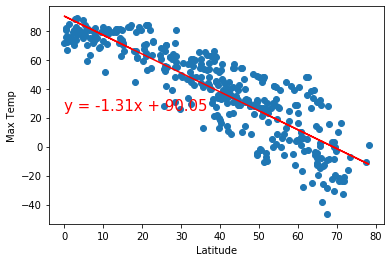

In [86]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(northern["Lat"],northern[ylbl],xlbl,ylbl,lblpos)

The r-squared is: 0.47889511657940736


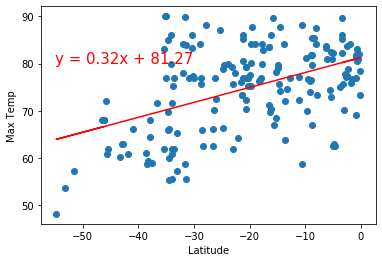

In [87]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-55,80)
plotLinearRegression(southern["Lat"],southern[ylbl],xlbl,ylbl,lblpos)

The r-squared is: 0.3717633224750008


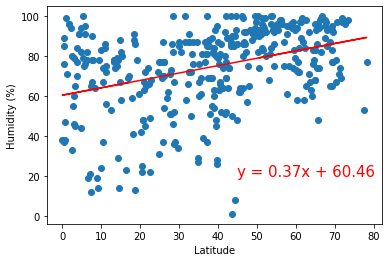

In [94]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (45,20)
plotLinearRegression(northern["Lat"],northern["Humidity"],xlbl,ylbl,lblpos)

The r-squared is: 0.48734218049991523


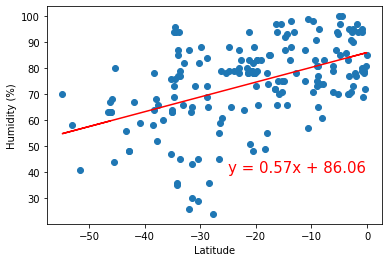

In [97]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (-25,40)
plotLinearRegression(southern["Lat"],southern["Humidity"],xlbl,ylbl,lblpos)

The r-squared is: 0.2787371441591948


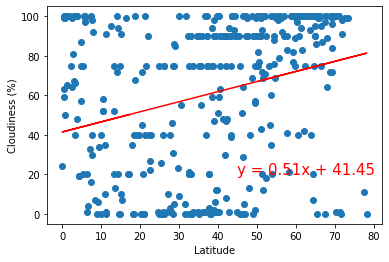

In [101]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloudiness (%)"
lblpos = (45,20)
plotLinearRegression(northern["Lat"],northern["Cloudiness"],xlbl,ylbl,lblpos)

The r-squared is: 0.36620472465828763


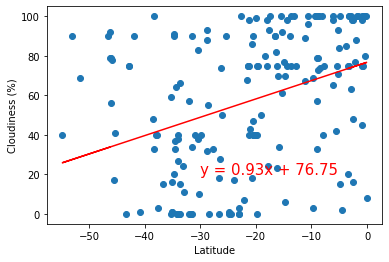

In [104]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloudiness (%)"
lblpos = (-30,20)
plotLinearRegression(southern["Lat"],southern["Cloudiness"],xlbl,ylbl,lblpos)

The r-squared is: 0.10049613854537477


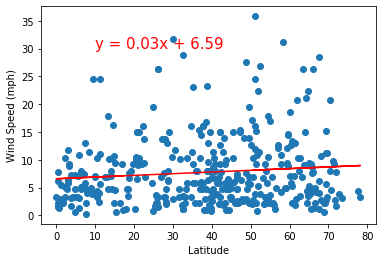

In [106]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (10,30)
plotLinearRegression(northern["Lat"],northern["Wind Speed"],xlbl,ylbl,lblpos)

The r-squared is: -0.3103747368020941


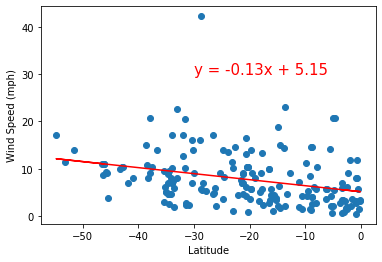

In [109]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (-30,30)
plotLinearRegression(southern["Lat"],southern["Wind Speed"],xlbl,ylbl,lblpos)